In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import cv2

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation
from keras.optimizers import RMSprop, adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# For adding new activation function
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
import tensorflow as tf
from tensorflow.python.client import device_lib
from keras.models import load_model
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

sns.set(style='white', context='notebook', palette='deep')

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
def swish(x):
    return (K.sigmoid(x) * x)

model = load_model("my_model_az.h5", custom_objects={'swish': swish})#loading the saved model

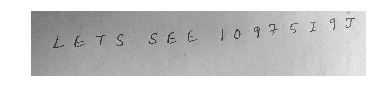

In [4]:
img1 = cv2.imread('amrit_hw.jpg') #input image
img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) #convert RGB image to grayscale
plt.imshow(img,cmap='gray') #display the image
plt.axis('off')
plt.show()

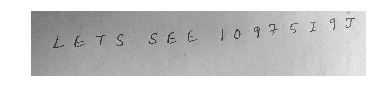

In [5]:
#blur = cv2.bilateralFilter(img,9,75,75)
kernel = np.ones((5,5),np.float32)/(5*5)
blur = cv2.filter2D(img,-1,kernel)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

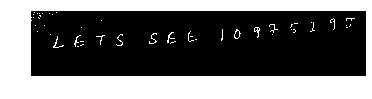

In [6]:
ret2,th2 = cv2.threshold(img,100,255,cv2.THRESH_BINARY_INV) #Thresholding the image
plt.imshow(th2,cmap='gray')
plt.axis('off')
plt.show()

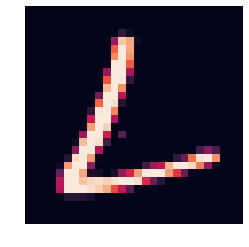

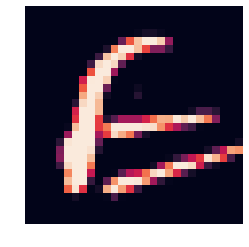

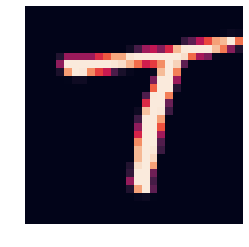

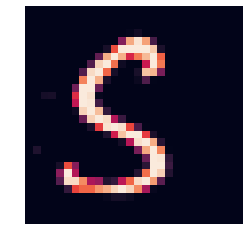

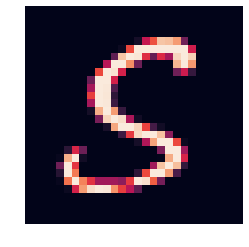

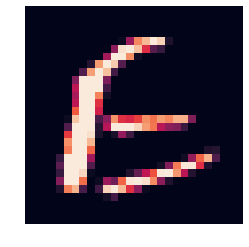

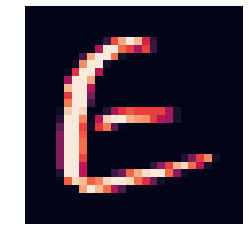

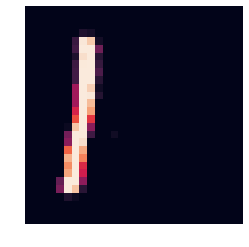

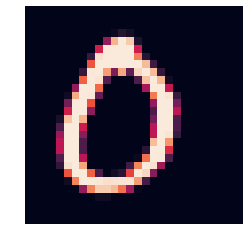

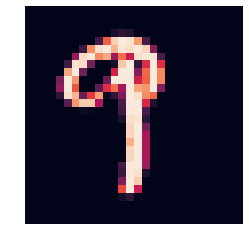

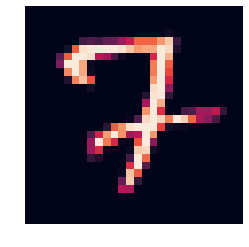

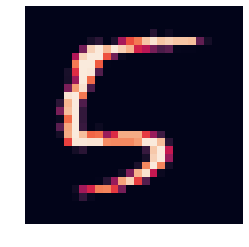

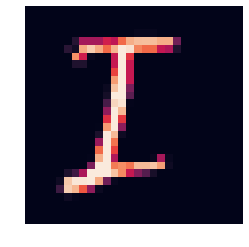

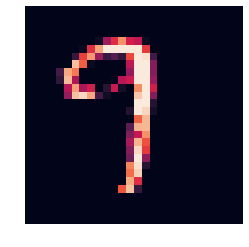

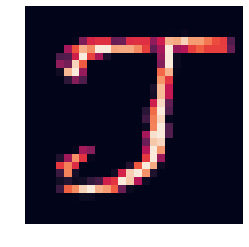

In [10]:
im2,ctrs,hier = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) #Finding the contours of distinct objects/digits

xs = [] #for storing the 
roi = []
size = np.min(np.shape(img)[:])
min_box = 0.145*size;
for c in ctrs:
    x,y,w,h = cv2.boundingRect(c)
    box_size = max(h,w)
    if box_size > min_box:
        xs.append(x)
        roi_img=th2[y-np.int0(0.2*box_size):y+np.int0(1.2*box_size), x-np.int0(0.2*box_size):x+np.int0(1*box_size)]
        resized_img = cv2.resize(roi_img, (28, 28), interpolation = cv2.INTER_AREA)
        resized_img = resized_img/255.0
        plt.imshow(resized_img)
        plt.axis('off')
        plt.show()
        roi_img = th2[y:y+box_size, x:x+box_size]
        roi.append(resized_img)
ind = np.argsort(xs)
roi = np.array(roi)
roi = roi[ind]

In [11]:
# predict results
roi = np.reshape(roi,[-1,28,28,1])
results = model.predict(roi)

# select the index with the maximum probability
results = np.argmax(results,axis = 1)
print(results)
results = pd.Series(results,name="Label")
characters = np.array(['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P',
                      'Q','R','S','T','U','V','W','X','Y','Z'])
output = characters[results]

[21 16 29 28 28 14 14  1 24  9  7  5 18  9 19]


In [13]:
print(output)

['L' 'G' 'T' 'S' 'S' 'E' 'E' '1' 'O' '9' '7' '5' 'I' '9' 'J']
